In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [7]:
import sys
import os 

#Completely optional, this helps time different parts of the code
from timer_class import Timer

In [40]:
# Define the full path to the CSV file


#Update this path for the file: fix_sector_add_marketcap
csv_file = r'C:\Users\holsg\Documents\Python\UBCTG\Michael\fix_sector_add_marketcap.csv'

t = Timer()

t.start()

# Read the CSV file
df = pd.read_csv(csv_file)
#Drop this column now; it is wrong and needs to be fixed anyways 
df = df.drop(columns=['sector'])

t.end()

df

Starting timer.
Ending timer.
Total elapsed time: 2.255983352661133 seconds



,Date,Permno,Ticker,Returns
0,2018-01-02,10026,JJSF,-0.017454
1,2018-01-03,10026,JJSF,-0.009988
2,2018-01-04,10026,JJSF,0.013813
3,2018-01-05,10026,JJSF,-0.009551
4,2018-01-08,10026,JJSF,0.000742
...,...,...,...,...
5884311,2021-01-25,93436,TSLA,0.040348
5884312,2021-01-26,93436,TSLA,0.002600
5884313,2021-01-27,93436,TSLA,-0.021436
5884314,2021-01-28,93436,TSLA,-0.033246


In [4]:
#Split this into 1 dataframe per unique ticker.

#Create a list of unique tickers
unique_tickers = df['Ticker'].unique()
# print(f"Number of unique tickers: {len(unique_tickers)}")

#Remove the nan
unique_tickers = [ticker for ticker in unique_tickers if isinstance(ticker, str)]
print(f"Number of unique tickers: {len(unique_tickers)}")

Number of unique tickers: 9782


In [5]:
#Need to convert permno to sic

#Update this path for file: permno_sic
csv_file = r'C:\Users\holsg\Documents\Python\UBCTG\Michael\permno_sic.csv'

# Read the CSV file
permno_to_sic_df = pd.read_csv(csv_file)


permno_to_sic_df

,GVKEY,LPERMNO,datadate,fyearq,fqtr,indfmt,consol,popsrc,datafmt,tic,curcdq,datacqtr,datafqtr,costat,sic
0,1004,54594,1980-08-31,1980,1,INDL,C,D,STD,AIR,USD,1980Q3,1980Q1,A,5080
1,1004,54594,1980-11-30,1980,2,INDL,C,D,STD,AIR,USD,1980Q4,1980Q2,A,5080
2,1004,54594,1981-02-28,1980,3,INDL,C,D,STD,AIR,USD,1981Q1,1980Q3,A,5080
3,1004,54594,1981-05-31,1980,4,INDL,C,D,STD,AIR,USD,1981Q2,1980Q4,A,5080
4,1004,54594,1981-08-31,1981,1,INDL,C,D,STD,AIR,USD,1981Q3,1981Q1,A,5080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866354,353444,23209,2022-12-31,2022,4,INDL,C,D,STD,HLN,USD,2022Q4,2022Q4,A,2834
866355,353444,23209,2023-03-31,2023,1,INDL,C,D,STD,HLN,USD,2023Q1,2023Q1,A,2834
866356,353444,23209,2023-06-30,2023,2,INDL,C,D,STD,HLN,USD,2023Q2,2023Q2,A,2834
866357,353444,23209,2023-09-30,2023,3,INDL,C,D,STD,HLN,USD,2023Q3,2023Q3,A,2834


In [6]:
#Extract only permno and sic columns from above

get_sic_df = permno_to_sic_df[['LPERMNO', 'sic']]
get_sic_df

,LPERMNO,sic
0,54594,5080
1,54594,5080
2,54594,5080
3,54594,5080
4,54594,5080
...,...,...
866354,23209,2834
866355,23209,2834
866356,23209,2834
866357,23209,2834


In [7]:
# Define the file path
file_path = 'n6sgsgg3njz1fvs8.csv'

t.start()

# Read the CSV file with low_memory=False
market_df = pd.read_csv(file_path, low_memory=False)


#market cap = (BIDLO + ASKHI) / 2 * SHROUT
market_df['Market Cap'] = (market_df['BIDLO'] + market_df['ASKHI']) * market_df['SHROUT'] / 2


t.end()


market_df

NameError: name 't' is not defined

In [16]:
# Create a dictionary to store DataFrames by ticker
ticker_dfs = {}

# Initialize permno dict
permno_lists = {}


t.start()

# Set the maximum number of tickers to process
max_tickers = 10



# Process only the first few unique tickers
for i, ticker in enumerate(unique_tickers):    
    # Create DataFrame for each ticker
    ticker_df = df[df['Ticker'] == ticker]
    
    # Ensure DataFrame is not empty
    if not ticker_df.empty:
        # Store the Permno value from the first row in a list
        permno = ticker_df['Permno'].iloc[0]
        
        # Drop the 'Ticker' column from the DataFrame, keep 'Permno'
        ticker_df = ticker_df.drop(columns=['Ticker'])
        
        # Find the SIC code corresponding to the Permno
        sic_code = get_sic_df.loc[get_sic_df['LPERMNO'] == permno, 'sic'].values[0] if not get_sic_df.loc[get_sic_df['LPERMNO'] == permno, 'sic'].empty else None
        
        # Add the SIC code to the permno_list
        if sic_code is not None:
            permno_list = [permno, sic_code]
            
            # Find the industry sector based on the SIC code
            industry = 'None'
            for column in bucket_df.columns:
                if sic_code in bucket_df[column].values:
                    industry = column
                    break
            
            # Add the industry to the permno_list
            permno_list.append(industry)
        else:
            # If no SIC code is found, add 'None' for SIC and Industry
            permno_list = [permno, None, 'None']
        
        # Merge the market data with the ticker's DataFrame based on Date and Permno
        ticker_market_df = market_df[market_df['PERMNO'] == permno][['date', 'Market Cap']]
        ticker_df = pd.merge(ticker_df, ticker_market_df, left_on='Date', right_on='date', how='left')
        ticker_df = ticker_df.drop(columns=['date'])  # Drop the redundant date column
        
        # Store the cleaned DataFrame and Permno list in the dictionaries
        ticker_dfs[ticker] = ticker_df
        permno_lists[ticker] = permno_list
        
    # Print progress every 500 tickers
    if (i + 1) % 500 == 0:
        print(f'Processed {i + 1} tickers out of {len(unique_tickers)}.')

        
t.end()


Starting timer.
Processed 500 tickers out of 9782.
Processed 1000 tickers out of 9782.
Processed 1500 tickers out of 9782.
Processed 2000 tickers out of 9782.
Processed 2500 tickers out of 9782.
Processed 3000 tickers out of 9782.
Processed 3500 tickers out of 9782.
Processed 4000 tickers out of 9782.
Processed 4500 tickers out of 9782.
Processed 5000 tickers out of 9782.
Processed 5500 tickers out of 9782.
Processed 6000 tickers out of 9782.
Processed 6500 tickers out of 9782.
Processed 7000 tickers out of 9782.
Processed 7500 tickers out of 9782.
Processed 8000 tickers out of 9782.
Processed 8500 tickers out of 9782.
Processed 9000 tickers out of 9782.
Processed 9500 tickers out of 9782.
Ending timer.
Total elapsed time: 2891.5128383636475 seconds



In [17]:
ticker_dfs['TSLA']

,Date,Permno,Returns,Market Cap
0,2018-01-02,93436,0.029485,NaN
1,2018-01-03,93436,-0.010233,NaN
2,2018-01-04,93436,-0.008290,NaN
3,2018-01-05,93436,0.006230,NaN
4,2018-01-08,93436,0.062638,NaN
...,...,...,...,...
770,2021-01-25,93436,0.040348,8.346987e+08
771,2021-01-26,93436,0.002600,8.482710e+08
772,2021-01-27,93436,-0.021436,8.399490e+08
773,2021-01-28,93436,-0.033246,7.913996e+08


# Processing.

In [22]:
#Ok this worked, pog. It's columns of returns. Now start building indices from glenn excel sheet 

t.start()

# Identify the ticker with the earliest start date
earliest_ticker = None
earliest_date = None

for ticker in unique_tickers:
    first_date = ticker_dfs[ticker]['Date'].min()
    if earliest_date is None or first_date < earliest_date:
        earliest_date = first_date
        earliest_ticker = ticker

# Check if earliest_ticker is found and proceed
if earliest_ticker is not None:
    # Extract dates from the 'Date' column of the earliest ticker
    dates = ticker_dfs[earliest_ticker]['Date']
    
    # Initialize returns_df with these dates
    returns_df = pd.DataFrame(index=dates)
    
    # Fill returns_df with data from each ticker
    for ticker in unique_tickers:
        # Collect returns column
        returns_column = ticker_dfs[ticker].set_index('Date')['Returns']
        
        # Assign returns_column to the respective ticker column in returns_df
        returns_df[ticker] = returns_df.index.map(returns_column.to_dict()).fillna(pd.NA)

else:
    raise ValueError("No ticker found with valid dates.")


t.end()
            
# returns_df

Starting timer.


C:\Users\holsg\AppData\Local\Temp/ipykernel_6852/2067129846.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  returns_df[ticker] = returns_df.index.map(returns_column.to_dict()).fillna(pd.NA)


Ending timer.
Total elapsed time: 12.649027824401855 seconds



In [23]:
#Fix some weird stuff happening in subsequent calculations 
returns_df = returns_df.apply(pd.to_numeric, errors='coerce')
print('Returns:')
returns_df

Returns:


,JJSF,DGSE,ELA,PLXS,RMCF,HNGR,ADX,ORCL,MSFT,AADR,...,QEP,SIX,CORN,BNO,VPG,FN,BSFT,CBOE,SANW,TSLA
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,-0.017454,0.041890,NaN,0.005929,-0.006741,NaN,0.004657,-0.013748,0.004793,0.024639,...,0.051202,0.004056,0.004652,0.000000,0.005964,0.013937,-0.003643,-0.014768,0.012821,0.029485
2018-01-03,-0.009988,0.010206,NaN,0.001310,0.025641,NaN,0.007947,0.023161,0.004654,0.010448,...,0.031809,-0.019599,-0.000297,0.019337,0.015810,-0.003780,-0.000914,0.006599,0.012658,-0.010233
2018-01-04,0.013813,-0.020512,NaN,0.012263,0.002500,NaN,0.008541,0.009851,0.008801,0.003775,...,0.009634,-0.006867,-0.003563,0.001626,0.025292,0.012418,-0.000915,0.003885,0.000000,-0.008290
2018-01-05,-0.009551,-0.010315,NaN,0.004927,-0.002494,NaN,0.001954,0.006019,0.012398,0.007848,...,-0.000954,0.009527,-0.001478,-0.003247,-0.007590,0.000681,0.002747,0.028700,-0.025000,0.006230
2018-01-08,0.000742,0.063165,NaN,0.046693,-0.008333,NaN,0.002601,0.010522,0.001021,0.000000,...,0.022923,0.004871,-0.010456,0.002172,-0.003824,0.016003,-0.001826,0.015125,0.038462,0.062638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,0.024822,NaN,0.016575,-0.012597,-0.022472,0.001312,0.001130,0.008946,0.015844,-0.013262,...,-0.031949,-0.006222,0.019558,0.009461,0.000593,-0.003379,NaN,0.004097,0.019444,0.040348
2021-01-26,0.051119,NaN,0.043478,-0.041151,0.039080,-0.005677,-0.000564,0.014778,0.012199,-0.010730,...,-0.026403,-0.048947,0.029703,-0.002163,0.006517,-0.029113,NaN,0.001465,-0.079019,0.002600
2021-01-27,-0.040204,NaN,0.029514,-0.010566,-0.035398,-0.051383,-0.027103,0.012136,0.002453,-0.040135,...,-0.054237,-0.052962,-0.002404,-0.003613,-0.019423,-0.027938,NaN,-0.043560,0.038462,-0.021436


In [24]:
#Cumulative return df 

# Initialize a list to store cum Series
cum_returns_list = []



t.start()

for ticker in returns_df.columns:
    # Calculate cumulative returns
    cum_returns = pd.Series(index=returns_df.index, dtype='float64')
    started = False  # Flag to indicate when the calculation starts
    for i in range(len(returns_df)):
        if pd.notna(returns_df[ticker].iloc[i]):
            if not started:
                # Initialize with the first valid return
                cum_returns.iloc[i] = 1 + returns_df[ticker].iloc[i]
                started = True
            else:
                # Calculate cumulative return
                cum_returns.iloc[i] = cum_returns.iloc[i-1] * (1 + returns_df[ticker].iloc[i])
        else:
            # Carry forward the last valid cumulative return
            if started:
                cum_returns.iloc[i] = cum_returns.iloc[i-1]
    
    # Append the cumulative returns Series to the list, with ticker as the name
    cum_returns.name = ticker
    cum_returns_list.append(cum_returns)

# Concatenate all cumulative returns Series into a single DataFrame
cum_stock_returns_df = pd.concat(cum_returns_list, axis=1)

t.end()

print('Cumulative Stock Returns:')
cum_stock_returns_df

Starting timer.
Ending timer.
Total elapsed time: 312.0553321838379 seconds

Cumulative Stock Returns:


,JJSF,DGSE,ELA,PLXS,RMCF,HNGR,ADX,ORCL,MSFT,AADR,...,QEP,SIX,CORN,BNO,VPG,FN,BSFT,CBOE,SANW,TSLA
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.982546,1.041890,NaN,1.005929,0.993259,NaN,1.004657,0.986252,1.004793,1.024639,...,1.051202,1.004056,1.004652,1.000000,1.005964,1.013937,0.996357,0.985232,1.012821,1.029485
2018-01-03,0.972732,1.052524,NaN,1.007247,1.018727,NaN,1.012641,1.009095,1.009469,1.035344,...,1.084640,0.984378,1.004354,1.019337,1.021868,1.010104,0.995446,0.991734,1.025641,1.018950
2018-01-04,0.986169,1.030934,NaN,1.019599,1.021274,NaN,1.021290,1.019035,1.018354,1.039253,...,1.095089,0.977618,1.000775,1.020994,1.047713,1.022648,0.994535,0.995586,1.025641,1.010503
2018-01-05,0.976750,1.020300,NaN,1.024622,1.018727,NaN,1.023286,1.025169,1.030979,1.047409,...,1.094044,0.986932,0.999296,1.017679,1.039761,1.023344,0.997267,1.024160,1.000000,1.016799
2018-01-08,0.977475,1.084747,NaN,1.072465,1.010238,NaN,1.025947,1.035956,1.032032,1.047409,...,1.119123,0.991739,0.988847,1.019890,1.035785,1.039721,0.995446,1.039650,1.038462,1.080489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,1.078199,1.503758,3.942855,1.316689,0.413459,0.968278,1.574015,1.359181,2.799764,1.086282,...,0.323463,0.596927,0.963790,0.766305,1.342348,2.980143,1.000001,0.797808,0.941025,14.144883
2021-01-26,1.133315,1.503758,4.114283,1.262506,0.429617,0.962781,1.573128,1.379267,2.833918,1.074626,...,0.314922,0.567709,0.992417,0.764648,1.351096,2.893383,1.000001,0.798977,0.866666,14.181660
2021-01-27,1.087751,1.503758,4.235711,1.249167,0.414410,0.913311,1.530491,1.396006,2.840870,1.031496,...,0.297842,0.537642,0.990032,0.761885,1.324854,2.812547,1.000001,0.764174,0.900000,13.877662


In [26]:
ticker_dfs['JJSF']

,Date,Permno,Returns,Market Cap
0,2018-01-02,10026,-0.017454,NaN
1,2018-01-03,10026,-0.009988,NaN
2,2018-01-04,10026,0.013813,NaN
3,2018-01-05,10026,-0.009551,NaN
4,2018-01-08,10026,0.000742,NaN
...,...,...,...,...
770,2021-01-25,10026,0.024822,2.943750e+06
771,2021-01-26,10026,0.051119,2.984415e+06
772,2021-01-27,10026,-0.040204,3.090039e+06
773,2021-01-28,10026,-0.018827,2.996562e+06


In [87]:
t.start()

# Initialize an empty list to collect all dates
all_dates = []

# Loop through each ticker and collect dates
for ticker in ticker_dfs:
    placeholder_df = ticker_dfs[ticker]
    
    # Convert the Date column to datetime if it's not already
    placeholder_df['Date'] = pd.to_datetime(placeholder_df['Date'])
    
    # Append the dates to the list
    all_dates.extend(placeholder_df['Date'].tolist())

# Create a set from the list to get unique dates and then sort them
unique_dates = sorted(set(all_dates))

# Convert the list of unique dates to a Pandas DatetimeIndex
date_range = pd.DatetimeIndex(unique_dates)

# Print the total number of unique dates
print(f'Total number of unique dates: {len(date_range)}')

# Print the date range
# print(date_range)

t.end()

Starting timer.
Total number of unique dates: 775
Ending timer.
Total elapsed time: 14.723414182662964 seconds



# BRUH

In [89]:
t.start()

# Step 2: Create an empty list to store the series for each ticker
market_cap_series_list = []


# Step 3: Loop through each ticker to extract and extend the Market Cap column
for ticker in unique_tickers:
    placeholder_df = ticker_dfs[ticker]
    
    # Convert the Date column to datetime if it's not already
    placeholder_df['Date'] = pd.to_datetime(placeholder_df['Date'])
    
    # Remove duplicates based on the Date column
    placeholder_df = placeholder_df.drop_duplicates(subset='Date')
    
    # Extract the Market Cap series and set Date as index
    market_cap_series = placeholder_df[['Date', 'Market Cap']].rename(columns={'Market Cap': ticker}).set_index('Date')
    
    # Reindex to ensure it spans the entire date range with NaNs for missing dates
    market_cap_series = market_cap_series.reindex(date_range)
    
    # Add the extended series to the list
    market_cap_series_list.append(market_cap_series)
    
    
# Step 4: Concatenate all series into the final dataframe
market_cap_df = pd.concat(market_cap_series_list, axis=1)

    
t.end()



# market_cap_df

Starting timer.
Ending timer.
Total elapsed time: 20.20862603187561 seconds



In [90]:
#Add total market cap
market_cap_df['Total Market Cap'] = market_cap_df.sum(axis=1)

market_cap_df

,JJSF,DGSE,ELA,PLXS,RMCF,HNGR,ADX,ORCL,MSFT,AADR,...,SIX,CORN,BNO,VPG,FN,BSFT,CBOE,SANW,TSLA,Total Market Cap
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,2.943750e+06,NaN,145798.8750,2.289310e+06,26573.7500,866217.57000,1919102.150,1.776945e+08,1.712083e+09,82264.910,...,2935020.603,144222.65875,376467.000,423065.16,3.177130e+06,NaN,1.023590e+07,123848.12500,8.346987e+08,5.304349e+10
2021-01-26,2.984415e+06,NaN,152395.5000,2.260857e+06,27059.3663,876030.63750,1929975.250,1.808814e+08,1.750775e+09,81545.750,...,2928307.420,149499.12500,379265.250,429780.48,3.131973e+06,NaN,1.031666e+07,121541.98750,8.482710e+08,5.322855e+10
2021-01-27,3.090039e+06,NaN,155222.6250,2.144599e+06,26482.6400,838302.72750,1891375.745,1.833397e+08,1.774608e+09,78734.500,...,2719688.885,150988.25000,377968.500,418138.50,2.998254e+06,NaN,1.008086e+07,118764.37300,8.399490e+08,5.216242e+10
2021-01-28,2.996562e+06,NaN,159126.7500,2.203332e+06,27149.2615,820143.78900,1894094.020,1.831336e+08,1.801571e+09,79686.750,...,2912161.790,151501.77250,378105.000,414529.80,2.988654e+06,NaN,1.001495e+07,118721.66675,7.913996e+08,5.234570e+10


In [60]:
# # #Now assign weights by % of the total market cap in each year erm 


# # t.start()

# # # Initialize weights_df
# # weights_df = market_cap_df.copy()
# # weights_df['Total_Market_Cap'] = weights_df.sum(axis=1)


# # # Loop through each value in weights_df
# # for date in weights_df.index:
# #     total_market_cap = weights_df.loc[date, 'Total_Market_Cap']
# #     for ticker in weights_df.columns[:-1]: #Dont count the total column just yet 
# #         value = weights_df.at[date, ticker]
# #         if pd.notna(value):  # Check not NaN
# #             weights_df.at[date, ticker] = value / total_market_cap
# #         else:
# #             weights_df.at[date, ticker] = np.nan  # Keep NaN for missing values
            
# # # Rename 'Total_Market_Cap' column to 'Total_Weight'
# # weights_df = weights_df.rename(columns={'Total_Market_Cap': 'Total_Weight'})

# # t.end()

# # print('Weights based on Market Cap:')
# # weights_df

# print('slow af...')

slow af...


In [94]:
#Better!

t.start()

# Initialize weights_df with the same data as market_cap_df
weights_df = market_cap_df.copy()


# Step 2: Compute weights directly using broadcasting (divides eveything by specified Total_Market_Cap column)
weights_df = weights_df.divide(weights_df['Total Market Cap'], axis=0)

weights_df.rename(columns={'Total Market Cap': 'Total Weight'}, inplace=True)


t.end()

print('Weights based on Market Cap:')
weights_df

Starting timer.
Ending timer.
Total elapsed time: 0.1470355987548828 seconds

Weights based on Market Cap:


,JJSF,DGSE,ELA,PLXS,RMCF,HNGR,ADX,ORCL,MSFT,AADR,...,SIX,CORN,BNO,VPG,FN,BSFT,CBOE,SANW,TSLA,Total Weight
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,0.000055,NaN,0.000003,0.000043,5.009804e-07,0.000016,0.000036,0.003350,0.032277,0.000002,...,0.000055,0.000003,0.000007,0.000008,0.000060,NaN,0.000193,0.000002,0.015736,1.0
2021-01-26,0.000056,NaN,0.000003,0.000042,5.083619e-07,0.000016,0.000036,0.003398,0.032892,0.000002,...,0.000055,0.000003,0.000007,0.000008,0.000059,NaN,0.000194,0.000002,0.015936,1.0
2021-01-27,0.000059,NaN,0.000003,0.000041,5.076957e-07,0.000016,0.000036,0.003515,0.034021,0.000002,...,0.000052,0.000003,0.000007,0.000008,0.000057,NaN,0.000193,0.000002,0.016103,1.0
2021-01-28,0.000057,NaN,0.000003,0.000042,5.186531e-07,0.000016,0.000036,0.003499,0.034417,0.000002,...,0.000056,0.000003,0.000007,0.000008,0.000057,NaN,0.000191,0.000002,0.015119,1.0


In [96]:
#Optimize run speed maybe by not computing every value, just the relevant vector 



#Now build the index column df


#This is actually easily computable by treating the dataframes as a matrix multiplication
#Dates are index, not a column, so they do not interfere 
#Also, NaN = boom. Just replace with a 0, and that contributes nothing to index so its as if we ignore it nayways 

#Multiply return df by transpose of weights. We collect the diagonal as our column of indices for each period. 



#First, cut last column to make dimensions OK
new_weights_df = weights_df.drop(columns='Total Weight')


#Fill NaN with 0
returns_df = returns_df.fillna(0)
new_weights_df = new_weights_df.fillna(0)


#Transpose the weights
transposed_weights_df = new_weights_df.T


#Match indices
transposed_weights_df.index = returns_df.columns


#Compute matrix multiplication 
result_df = returns_df.dot(transposed_weights_df)


if result_df.shape[0] == result_df.shape[1]:
    # Extract diagonal elements as a NumPy array
    diagonal_elements = np.diag(result_df)
    
    # Convert the NumPy array to a DataFrame with a single column
    index_df = pd.DataFrame(diagonal_elements, columns=['Diagonal'])
    
    
    
print('Index:')
index_df

Index:


,Diagonal
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
770,0.002933
771,-0.002561
772,-0.023789
773,0.009806


In [97]:
#Have index_df be with good index

# Initialize cumulative_index_df with NaNs and the same index as returns_df (which is indexed by dates)
index_df = pd.DataFrame(index=returns_df.index, columns=['Diagonal'])

# Compute matrix multiplication 
result_df = returns_df.dot(transposed_weights_df)

# Extract diagonal elements and assign to the index_df
if result_df.shape[0] == result_df.shape[1]:
    diagonal_elements = np.diag(result_df)
    index_df['Diagonal'] = diagonal_elements

# Print the updated index_df to verify
print('Index:')
index_df

Index:


,Diagonal
Date,
2018-01-02,0.000000
2018-01-03,0.000000
2018-01-04,0.000000
2018-01-05,0.000000
2018-01-08,0.000000
...,...
2021-01-25,0.002933
2021-01-26,-0.002561
2021-01-27,-0.023789


In [99]:
#Now create cum-index

# Initialize cumulative_index_df with NaNs and the same index as cum_stock_returns_df (which is indexed by dates)
cum_index_df = pd.DataFrame(index=cum_stock_returns_df.index, columns=['Cumulative'])

# Set the first row of cumulative_index_df
cum_index_df.iloc[0] = 1 + index_df['Diagonal'].iloc[0]

# Populate the rest of cumulative_index_df
for i in range(1, len(cum_index_df)):
    cum_index_df.iloc[i] = cum_index_df.iloc[i - 1] * (1 + index_df['Diagonal'].iloc[i])

# Print out the cumulative index DataFrame
print('Cumulative Index:')
cum_index_df

Cumulative Index:


,Cumulative
Date,
2018-01-02,1.0
2018-01-03,1.0
2018-01-04,1.0
2018-01-05,1.0
2018-01-08,1.0
...,...
2021-01-25,1.870051
2021-01-26,1.865262
2021-01-27,1.82089


In [118]:
#Start at 2019-01-02

cutoff_date = '2019-01-02'

cutoff_index_df = cum_index_df[cum_index_df.index >= cutoff_date]

cutoff_index_df

,Cumulative
Date,
2019-01-02,1.002281
2019-01-03,0.982076
2019-01-04,1.0154
2019-01-07,1.025213
2019-01-08,1.035911
...,...
2021-01-25,1.870051
2021-01-26,1.865262
2021-01-27,1.82089


In [120]:
file_path = 'cutoff_index_df.csv'
cutoff_index_df.to_csv(file_path, index=True)

# Some Plots

Starting timer.


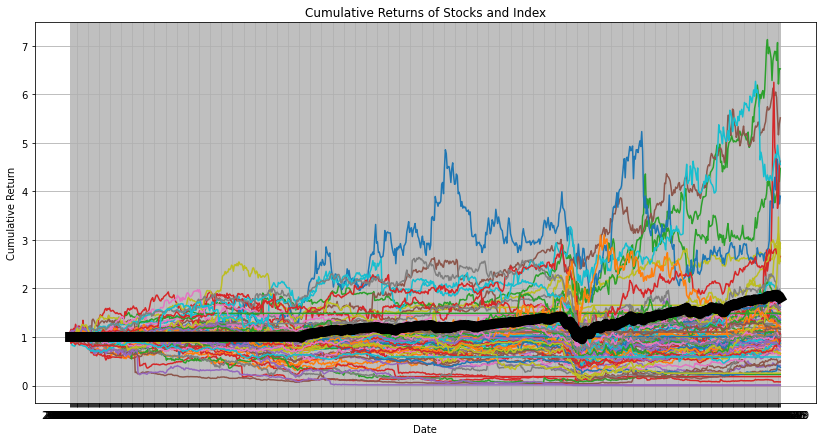

Ending timer.
Total elapsed time: 15.341503143310547 seconds



In [121]:
t.start()

# Set up the plot
plt.figure(figsize=(14, 7))

# Plot only the first 100 stocks' cumulative returns
for column in cum_stock_returns_df.columns[:100]:  # Select the first 100 columns first 
    plt.plot(cum_stock_returns_df.index, cum_stock_returns_df[column], label=column)

# Plot the cumulative returns of the index with an extra thick black line
plt.plot(cum_index_df.index, cum_index_df['Cumulative'], linestyle='-', linewidth=10, color='black', label='Index')

# Add titles and labels
plt.title('Cumulative Returns of Stocks and Index')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
# plt.legend()
plt.grid(True)

# Show the plot
plt.show()



t.end()

In [101]:
cum_index_df

,Cumulative
Date,
2018-01-02,1.0
2018-01-03,1.0
2018-01-04,1.0
2018-01-05,1.0
2018-01-08,1.0
...,...
2021-01-25,1.870051
2021-01-26,1.865262
2021-01-27,1.82089


In [102]:
cum_stock_returns_df

,JJSF,DGSE,ELA,PLXS,RMCF,HNGR,ADX,ORCL,MSFT,AADR,...,QEP,SIX,CORN,BNO,VPG,FN,BSFT,CBOE,SANW,TSLA
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,0.982546,1.041890,NaN,1.005929,0.993259,NaN,1.004657,0.986252,1.004793,1.024639,...,1.051202,1.004056,1.004652,1.000000,1.005964,1.013937,0.996357,0.985232,1.012821,1.029485
2018-01-03,0.972732,1.052524,NaN,1.007247,1.018727,NaN,1.012641,1.009095,1.009469,1.035344,...,1.084640,0.984378,1.004354,1.019337,1.021868,1.010104,0.995446,0.991734,1.025641,1.018950
2018-01-04,0.986169,1.030934,NaN,1.019599,1.021274,NaN,1.021290,1.019035,1.018354,1.039253,...,1.095089,0.977618,1.000775,1.020994,1.047713,1.022648,0.994535,0.995586,1.025641,1.010503
2018-01-05,0.976750,1.020300,NaN,1.024622,1.018727,NaN,1.023286,1.025169,1.030979,1.047409,...,1.094044,0.986932,0.999296,1.017679,1.039761,1.023344,0.997267,1.024160,1.000000,1.016799
2018-01-08,0.977475,1.084747,NaN,1.072465,1.010238,NaN,1.025947,1.035956,1.032032,1.047409,...,1.119123,0.991739,0.988847,1.019890,1.035785,1.039721,0.995446,1.039650,1.038462,1.080489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,1.078199,1.503758,3.942855,1.316689,0.413459,0.968278,1.574015,1.359181,2.799764,1.086282,...,0.323463,0.596927,0.963790,0.766305,1.342348,2.980143,1.000001,0.797808,0.941025,14.144883
2021-01-26,1.133315,1.503758,4.114283,1.262506,0.429617,0.962781,1.573128,1.379267,2.833918,1.074626,...,0.314922,0.567709,0.992417,0.764648,1.351096,2.893383,1.000001,0.798977,0.866666,14.181660
2021-01-27,1.087751,1.503758,4.235711,1.249167,0.414410,0.913311,1.530491,1.396006,2.840870,1.031496,...,0.297842,0.537642,0.990032,0.761885,1.324854,2.812547,1.000001,0.764174,0.900000,13.877662
